<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [7]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Median value of owner-occupied homes

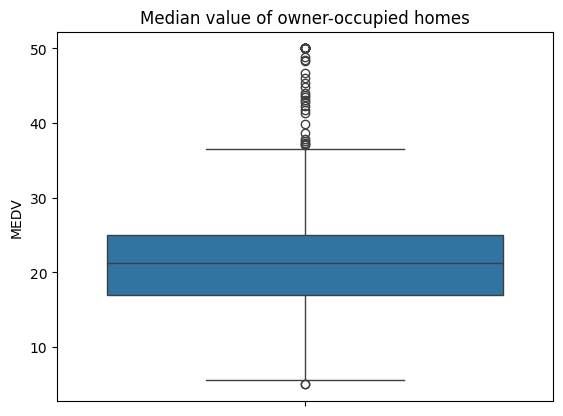

In [31]:
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Median value of owner-occupied homes')
pyplot.ylabel('MEDV')
pyplot.show()

### Charles river variable

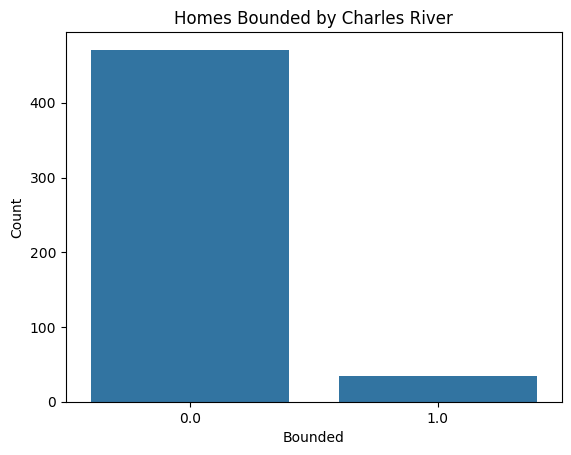

In [32]:
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Homes Bounded by Charles River')
pyplot.xlabel('Bounded')
pyplot.ylabel('Count')
pyplot.show()

### MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

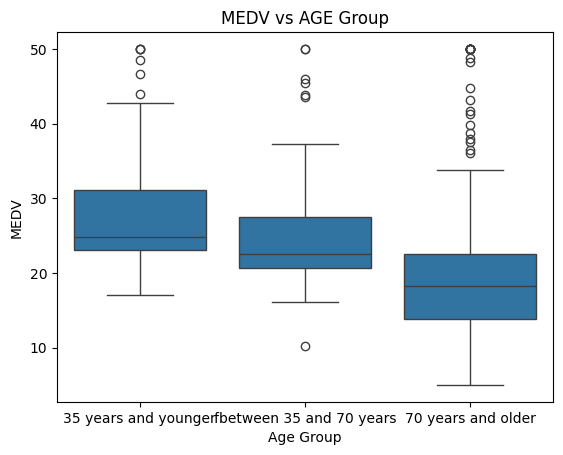

In [33]:
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'fbetween 35 and 70 years', '70 years and older'])
sns.boxplot(x=boston_df['AGE_Group'], y=boston_df['MEDV'])
pyplot.title('MEDV vs AGE Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('MEDV')
pyplot.show()

###  Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

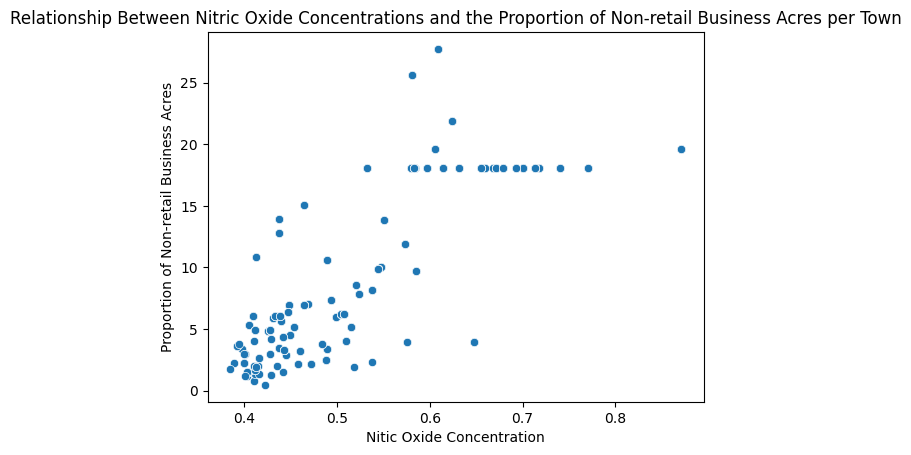

In [35]:
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
pyplot.title('Relationship Between Nitric Oxide Concentrations and the Proportion of Non-retail Business Acres per Town')
pyplot.xlabel('Nitic Oxide Concentration')
pyplot.ylabel('Proportion of Non-retail Business Acres')
pyplot.show()

### Pupil to teacher ratio variable

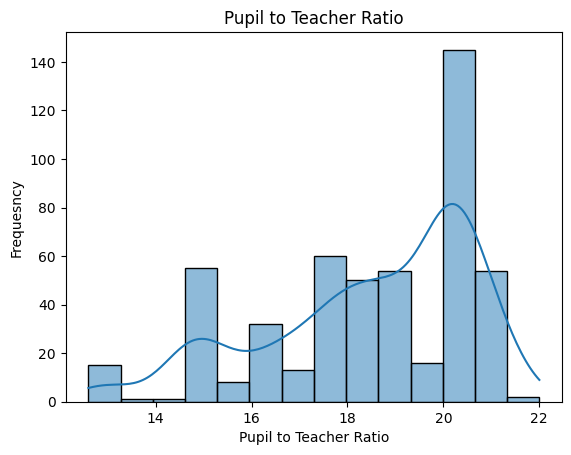

In [36]:
sns. histplot(boston_df['PTRATIO'], kde=True)
pyplot.title('Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequesncy')
pyplot.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [37]:
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(chas_1, chas_0, equal_var=False)
print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: 3.113291312794837, p-value: 0.003567170098137517


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [38]:
model = ols('MEDV ~ AGE_Group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq     df         F        PR(>F)
AGE_Group   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [39]:
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Correlation coefficent: {correlation}, p-value: {p_value}')

Correlation coefficent: 0.7636514469209192, p-value: 7.913361061210442e-98


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [40]:
x = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        16:18:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0